In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [2]:
random.seed(1)

In [4]:
os.chdir('/Users/andreasabia/Documents/ESCP/Semester 2/Machine Learning With Python/project/')
df=pd.read_csv('./clean_train3.csv', sep=';')

In [6]:
# dropping rows with missing targets
df = df[df['ID'].notna()]
# dropping old index
df.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')
# creating target series
sex=df['sex_y']
age=df['age_y']
ID=df['ID']
# dropping targets from dataset
data=df.drop(['age_y','sex_y','ID'], axis=1)
# Filling missing values with 0
data.fillna(0, inplace=True)

In [7]:
# as we have very few records for 80 year olds, we are going to set all of the older than 80 to 80
oldage=age.tolist()
newage=[]
for i in range(len(age)):
    if oldage[i] >= 80:
        newage.append(81)
    elif oldage[i] <=20:
        newage.append(21)
    else:
        newage.append(oldage[i])
age=newage
age=pd.cut(age, bins=[20,30,40,50,60,70,80,90], labels=[20,30,40,50,60,70,80])

In [10]:
sex

0        F
1        M
2        F
3        F
4        F
        ..
19995    M
19996    M
19997    M
19998    F
19999    M
Name: sex_y, Length: 20000, dtype: object

In [13]:
age

[60, 30, 40, 40, 40, ..., 40, 50, 20, 20, 30]
Length: 20000
Categories (7, int64): [20 < 30 < 40 < 50 < 60 < 70 < 80]

In [15]:
data

,(et,(photo),(video),aaa,aah,abandon,abandonnee,abandonner,abats,abattage,...,zodiaque,zoe,zola,zombie,zona,zone,zones,zoo,zuckerberg,zygel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Predicting Sex

In [16]:
X_train, X_test, y_train, y_test=train_test_split(data,sex,test_size=0.2)

In [39]:
parameters={'bootstrap': [True, False],
 'max_depth': [1,5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 1000, 2000, 4000]}

In [ ]:
parameters={'max_depth': [1,5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'n_estimators': [200, 1000, 2000, 4000]}

In [47]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, param_grid = parameters,verbose=2)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   3.2s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   2.7s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   2.7s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   2.7s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   7.4s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   7.4s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   7.4s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=2, min_samples_split=10,

[CV]  bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   7.4s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   7.4s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   8.4s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estim

[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=  28.8s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=  28.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=  27.8s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=  27.8s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_est

[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=  27.6s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=  27.5s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=  27.5s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=  27.6s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=  27.6s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_spli

KeyboardInterrupt: 

In [17]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 500, max_depth=10)
# Train the model on training data
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [18]:
confusion_matrix(predictions,y_test)

array([[ 303,   78],
       [1623, 1996]])

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           F       0.80      0.16      0.26      1926
           M       0.55      0.96      0.70      2074

    accuracy                           0.57      4000
   macro avg       0.67      0.56      0.48      4000
weighted avg       0.67      0.57      0.49      4000



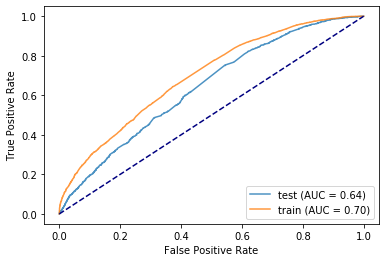

In [21]:
ax = plt.gca()
test_rf = plot_roc_curve(rf, X_test, y_test,ax=ax, alpha=0.8, name="test")
train_rf = plot_roc_curve(rf, X_train, y_train,ax=ax, alpha=0.8, name="train")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

### Predicting Age

In [22]:
X_train, X_test, y_train, y_test=train_test_split(data,age,test_size=0.4, stratify=age)

In [23]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
predictions = rf.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          20       0.18      0.14      0.16       881
          30       0.28      0.32      0.30      2017
          40       0.28      0.33      0.30      2293
          50       0.23      0.21      0.22      1588
          60       0.20      0.15      0.17       986
          70       0.04      0.02      0.03       213
          80       0.00      0.00      0.00        22

    accuracy                           0.25      8000
   macro avg       0.17      0.17      0.17      8000
weighted avg       0.24      0.25      0.24      8000



In [25]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(predictions, y_test)

array([[[6556,  759],
        [ 563,  122]],

       [[4325, 1365],
        [1658,  652]],

       [[3722, 1525],
        [1985,  768]],

       [[5296, 1261],
        [1116,  327]],

       [[6444,  842],
        [ 570,  144]],

       [[7698,  209],
        [  89,    4]],

       [[7976,   22],
        [   2,    0]]])